# Data Creation and Plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



In [2]:
x = np.random.normal(loc=0, scale=1, size=5000)
eps = np.random.normal(loc=0, scale=0.5, size=5000)
y = -1 + 0.5*x - 2*(x**2) + 0.3*(x**3) + eps

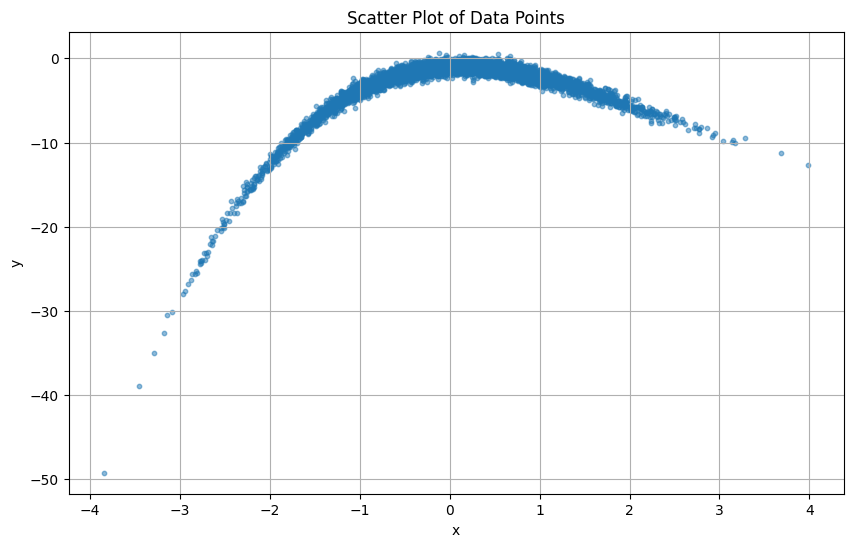

In [3]:
import matplotlib.pyplot as plt

# Plot scatter plot using x and y
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10)
plt.title('Scatter Plot of Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Since we want to use pytorch library, we have to convert our data into tensors.

In [4]:
X_tensor = torch.from_numpy(x.reshape(-1, 1)).float()
y_tensor = torch.from_numpy(y.reshape(-1, 1)).float()

# Initializing Models

In [5]:
class Adaline(nn.Module):
    """
    Adaptive Linear Neuron Classifier.
    Initialized in the format of a class with functions.
    __init__()  --> function will create a linear layer.
    forward() --> forward propagation function and returns the weghted sum of inputs plus the bias term.
    Returns a Linear Model.

    NOTE: About the gradient descent and stochastic gradient descent we will define it afterwards.
    """

    def __init__(self):
        super(Adaline, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


class SigmoidNeuron(nn.Module):
  """
  SigmoidNeuron class
  __init__()  --> Create a linear layer and also a sigmoid function layer
    forward() --> forward propagation function and returns the weghted sum of inputs plus the bias term.
  """
  def __init__(self):
      super(SigmoidNeuron, self).__init__()
      self.linear = nn.Linear(1, 1)
      self.sigmoid = nn.Sigmoid()

  def forward(self, x):
      x = self.linear(x)
      x = self.sigmoid(x)
      return x

# Running the models
We will instantiate our models and also define loss function and optimization algorithm

In [6]:
model_adaline_zero = Adaline()
criterion = nn.MSELoss()
optimizer = optim.SGD(model_adaline_zero.parameters(), lr=0.01)    # Stochastic Gradient Descent Optimizer

loss_memory = []

for epoch in range(1000):
    # Forward pass
    outputs = model_adaline_zero(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss_memory.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss after each epoch
    print(f"Epoch No.: {epoch+1}/{1000}, Loss: {loss.item()}")

Epoch No.: 1/1000, Loss: 24.014619827270508
Epoch No.: 2/1000, Loss: 23.418840408325195
Epoch No.: 3/1000, Loss: 22.846643447875977
Epoch No.: 4/1000, Loss: 22.297100067138672
Epoch No.: 5/1000, Loss: 21.769306182861328
Epoch No.: 6/1000, Loss: 21.26240348815918
Epoch No.: 7/1000, Loss: 20.77556800842285
Epoch No.: 8/1000, Loss: 20.308002471923828
Epoch No.: 9/1000, Loss: 19.858945846557617
Epoch No.: 10/1000, Loss: 19.42766571044922
Epoch No.: 11/1000, Loss: 19.013450622558594
Epoch No.: 12/1000, Loss: 18.615636825561523
Epoch No.: 13/1000, Loss: 18.23356819152832
Epoch No.: 14/1000, Loss: 17.86662483215332
Epoch No.: 15/1000, Loss: 17.514205932617188
Epoch No.: 16/1000, Loss: 17.175737380981445
Epoch No.: 17/1000, Loss: 16.850664138793945
Epoch No.: 18/1000, Loss: 16.53845977783203
Epoch No.: 19/1000, Loss: 16.23861312866211
Epoch No.: 20/1000, Loss: 15.95063591003418
Epoch No.: 21/1000, Loss: 15.67405891418457
Epoch No.: 22/1000, Loss: 15.408428192138672
Epoch No.: 23/1000, Loss: 15

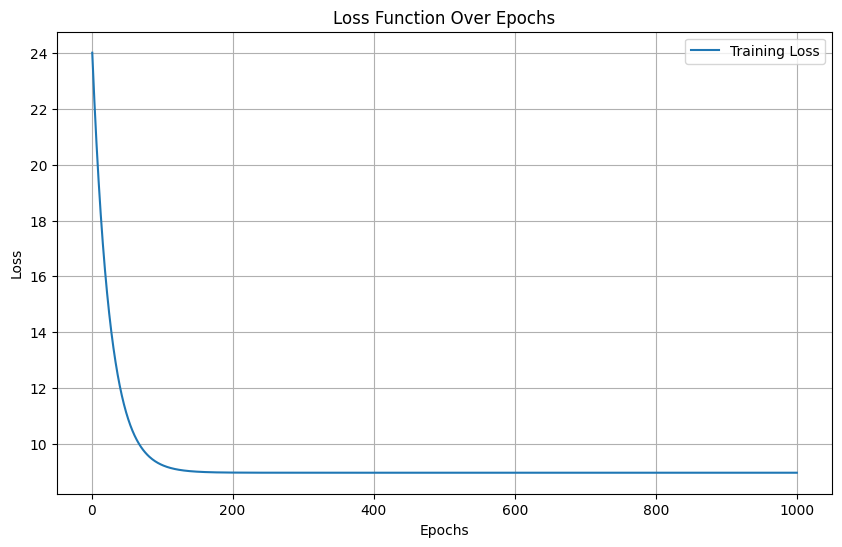

In [7]:
# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), loss_memory, label='Training Loss')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

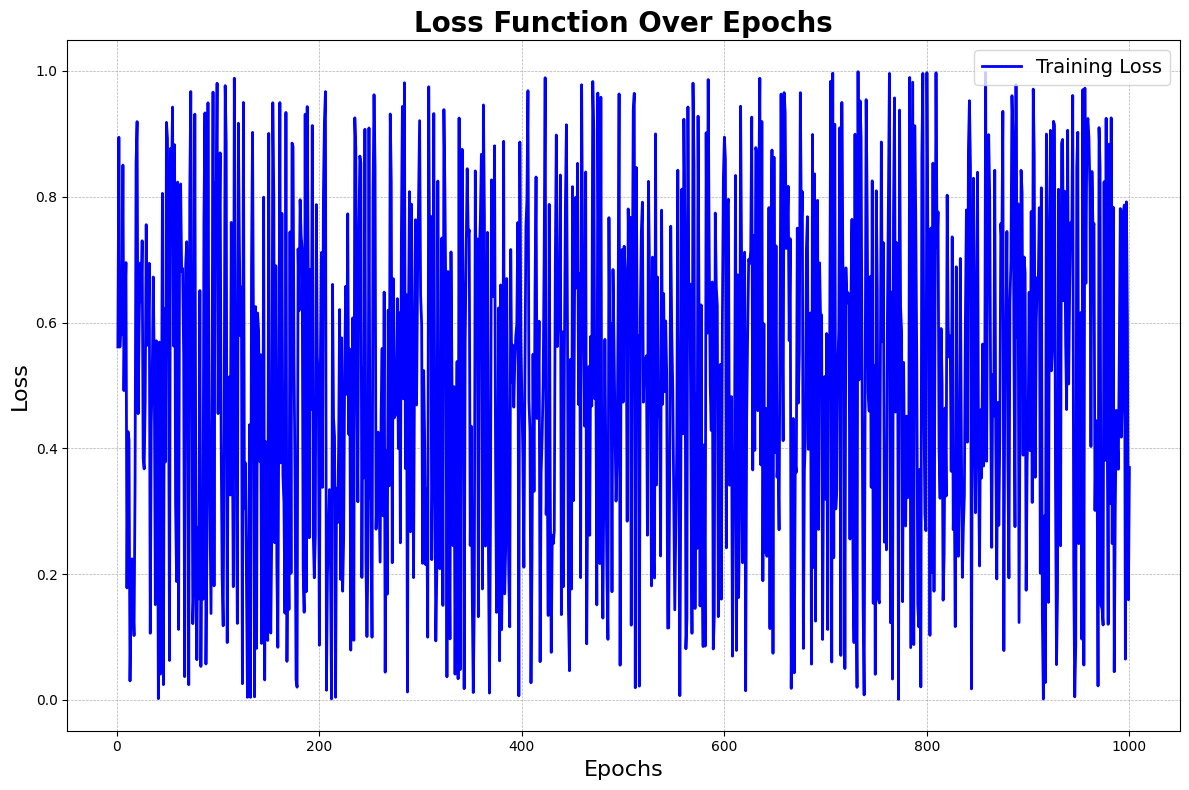

In [8]:
import matplotlib.pyplot as plt

# Example loss_memory for plotting
# Using a sample loss_memory array for demonstration
loss_memory = np.random.rand(1000)  # Replace with the actual loss_memory

# Enhanced plot for the loss function
plt.figure(figsize=(12, 8))
plt.plot(range(1, 1001), loss_memory, label='Training Loss', color='blue', linestyle='-', linewidth=2)

# Add titles and labels with improved font sizes and styles
plt.title('Loss Function Over Epochs', fontsize=20, fontweight='bold')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)

# Enhance the legend
plt.legend(fontsize=14, loc='upper right')

# Add grid with improved style
plt.grid(True, linestyle='--', linewidth=0.5)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the enhanced plot
plt.show()


# Adaline
In this section we are going to specifically target each model and see the result for K-fold cross validation
Our evaluation is based on `Mean Squared Error Loss`

### KFold

In [9]:
from sklearn.model_selection import KFold

criterion = nn.MSELoss()
kfold = KFold(n_splits=10, shuffle=True)

## SGD

In [10]:
eval_results = []                # Stores the evaluation result for each fold
epoch_num = 10
np.random.seed(42)   # Setting up random seed for getting regenratable results
for fold, (train_indices, test_indices) in enumerate(kfold.split(x)):
    print(f"Fold: {fold + 1}")

    # creating the indexes for the i fold
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # converting the data to tensors
    X_train_tensor = torch.from_numpy(x_train.reshape(-1, 1)).float()
    X_test_tensor = torch.from_numpy(x_test.reshape(-1, 1)).float()
    y_train_tensor = torch.from_numpy(y_train.reshape(-1, 1)).float()
    y_test_tensor = torch.from_numpy(y_test.reshape(-1, 1)).float()

    # creating the dataloader to help us implement SGD and BGD
    dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

    # creating the Adaline model
    model_adaline = Adaline()
    optimizer = torch.optim.SGD(model_adaline.parameters(), lr=0.01)

    for epoch in range(epoch_num):
        for inputs, targets in data_loader:
            # Forward pass
            outputs = model_adaline(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            break

    # Evaluate the model on the test set
    with torch.no_grad():
        model_adaline.eval()
        test_outputs = model_adaline(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        eval_results.append(test_loss.item())

    print(f"Test Loss: {test_loss.item()}")

# Calculate and print the average test loss across all folds
print("\n")
print("Average Test Loss:", sum(eval_results) / epoch_num)

Fold: 1
Test Loss: 21.455211639404297
Fold: 2
Test Loss: 17.78573226928711
Fold: 3
Test Loss: 24.153804779052734
Fold: 4
Test Loss: 13.988197326660156
Fold: 5
Test Loss: 14.136857032775879
Fold: 6
Test Loss: 18.740930557250977
Fold: 7
Test Loss: 16.909685134887695
Fold: 8
Test Loss: 14.618568420410156
Fold: 9
Test Loss: 15.54045295715332
Fold: 10
Test Loss: 24.6080265045166


Average Test Loss: 18.193746662139894


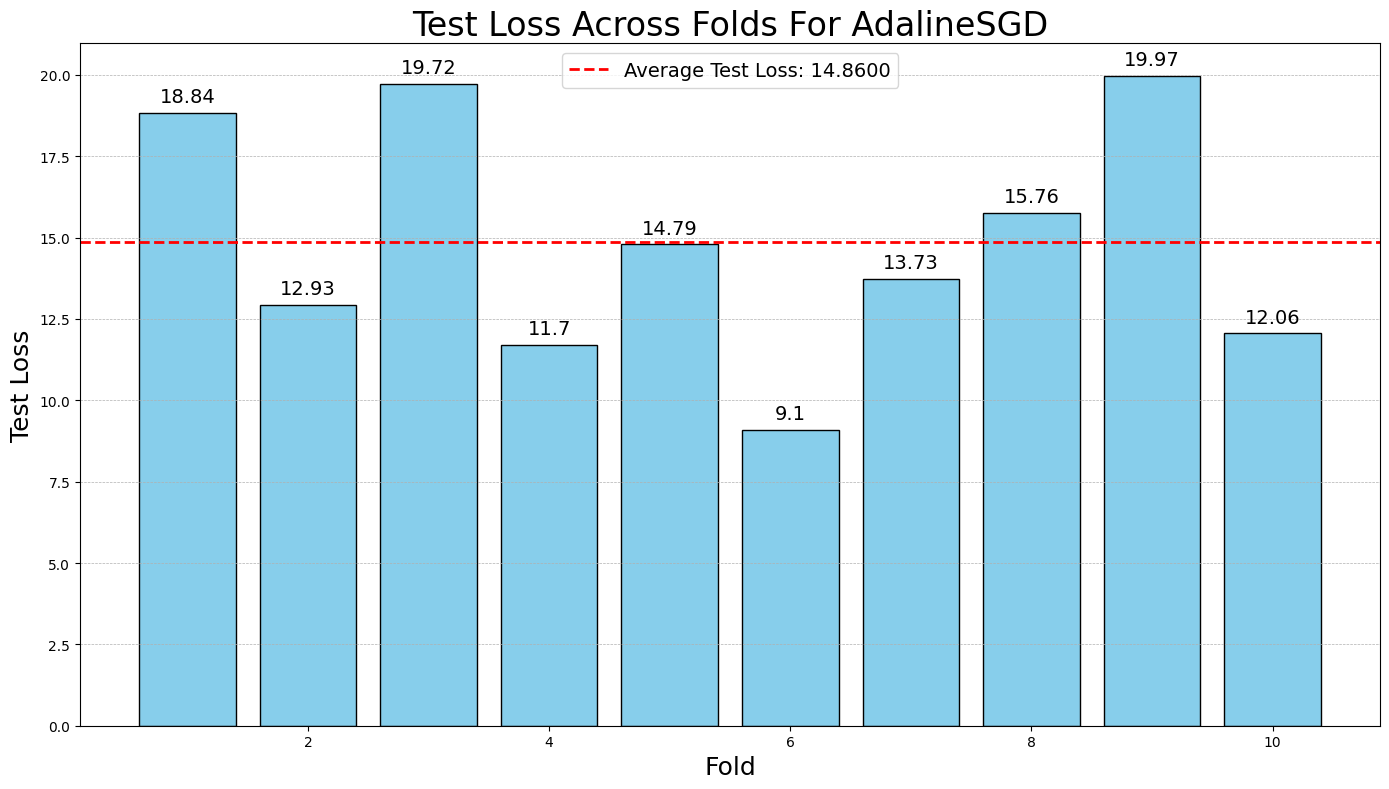

In [11]:
# Example eval_results for demonstration
eval_results = [18.84, 12.93, 19.72, 11.70, 14.79, 9.10, 13.73, 15.76, 19.97, 12.06]
red_line_value = 14.86

# Enhanced bar plot for eval_results
plt.figure(figsize=(14, 8))
bars = plt.bar(range(1, len(eval_results) + 1), eval_results, color='skyblue', edgecolor='black')

# Add titles and labels with improved font sizes and styles
plt.title('Test Loss Across Folds For AdalineSGD', fontsize=24)
plt.xlabel('Fold', fontsize=18)
plt.ylabel('Test Loss', fontsize=18)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 4), ha='center', va='bottom', fontsize=14)

# Add a red horizontal line at the specified value
plt.axhline(y=red_line_value, color='red', linestyle='--', linewidth=2, label=f'Average Test Loss: {red_line_value:.4f}')

# Enhance the grid
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Add legend
plt.legend(fontsize=14)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the enhanced bar plot
plt.show()


Since it is Stochastic Gradient Descent you can see the fluctuations in the evaluation result.

# Batch Gradient Descent

In [12]:
eval_results = []
epoch_num = 10
np.random.seed(42)

for fold, (train_indices, test_indices) in enumerate(kfold.split(x)):
    print(f"Fold: {fold + 1}")

    # creating the indexes for the i fold
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # converting the data to tensors
    X_train_tensor = torch.from_numpy(x_train.reshape(-1, 1)).float()
    X_test_tensor = torch.from_numpy(x_test.reshape(-1, 1)).float()
    y_train_tensor = torch.from_numpy(y_train.reshape(-1, 1)).float()
    y_test_tensor = torch.from_numpy(y_test.reshape(-1, 1)).float()

    # creating the dataloader to help us implement SGD and BGD
    dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(X_train_tensor), shuffle=True)

    # creating the Adaline model
    model_adaline = Adaline()
    optimizer = torch.optim.SGD(model_adaline.parameters(), lr=0.01)

    for epoch in range(epoch_num):
        for inputs, targets in data_loader:
            # Forward pass
            outputs = model_adaline(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    with torch.no_grad():
        model_adaline.eval()
        test_outputs = model_adaline(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        eval_results.append(test_loss.item())

    print(f"Test Loss: {test_loss.item()}")

# Calculate and print the average test loss across all folds
print("\n")
print("Average Test Loss:", sum(eval_results) / epoch_num)

Fold: 1
Test Loss: 16.222057342529297
Fold: 2
Test Loss: 15.886007308959961
Fold: 3
Test Loss: 19.25535774230957
Fold: 4
Test Loss: 14.601499557495117
Fold: 5
Test Loss: 14.943791389465332
Fold: 6
Test Loss: 18.38207244873047
Fold: 7
Test Loss: 20.694229125976562
Fold: 8
Test Loss: 15.824740409851074
Fold: 9
Test Loss: 14.892439842224121
Fold: 10
Test Loss: 21.418676376342773


Average Test Loss: 17.212087154388428


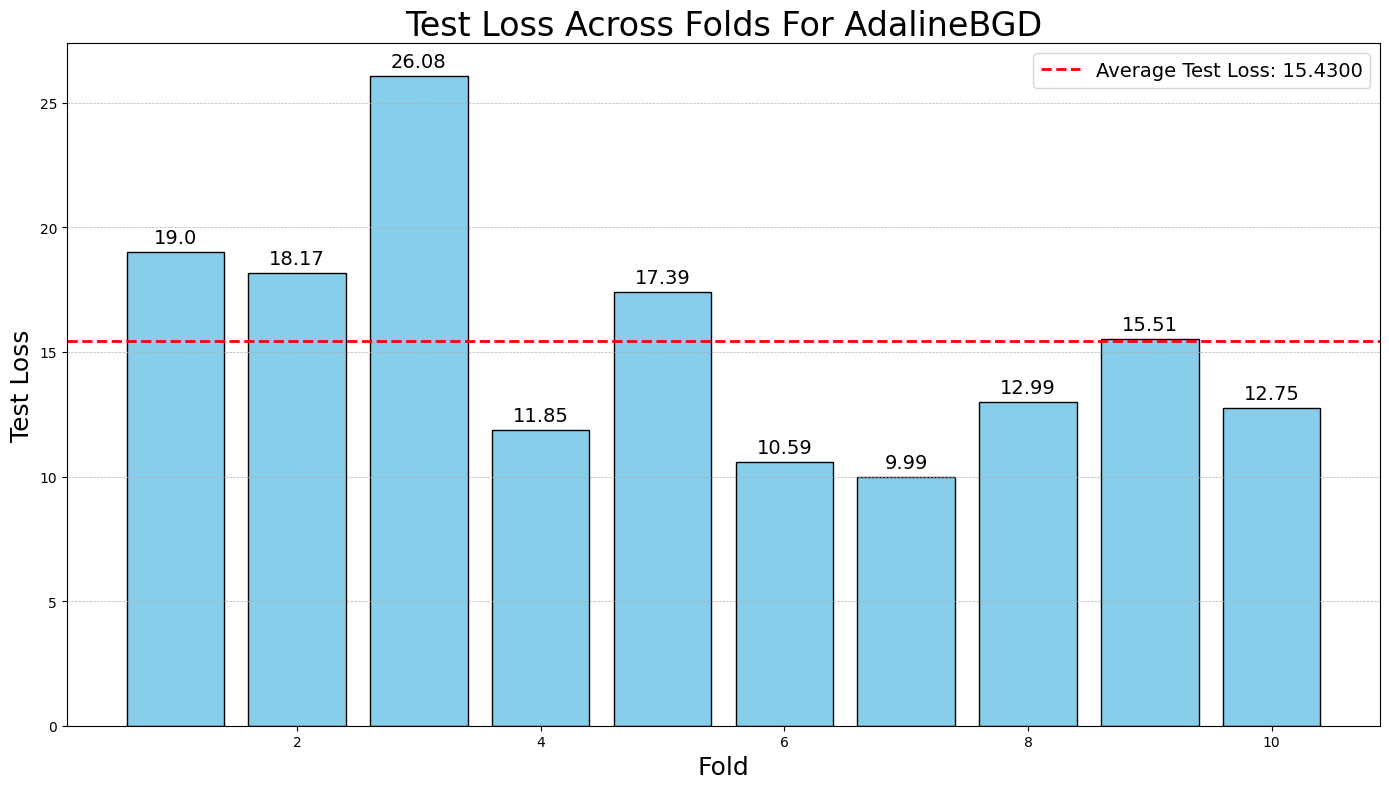

In [13]:
import matplotlib.pyplot as plt

# Example eval_results for demonstration
eval_results = [19, 18.17, 26.08, 11.85, 17.39, 10.59, 9.99, 12.99, 15.51, 12.75]
red_line_value = 15.43

# Enhanced bar plot for eval_results
plt.figure(figsize=(14, 8))
bars = plt.bar(range(1, len(eval_results) + 1), eval_results, color='skyblue', edgecolor='black')

# Add titles and labels with improved font sizes and styles
plt.title('Test Loss Across Folds For AdalineBGD', fontsize=24)
plt.xlabel('Fold', fontsize=18)
plt.ylabel('Test Loss', fontsize=18)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 4), ha='center', va='bottom', fontsize=14)

# Add a red horizontal line at the specified value
plt.axhline(y=red_line_value, color='red', linestyle='--', linewidth=2, label=f'Average Test Loss: {red_line_value:.4f}')

# Enhance the grid
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Add legend
plt.legend(fontsize=14)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the enhanced bar plot
plt.show()



As you can see the average value of BGD in compare with SGD is higher and that is because of the stochastic nature of SGD.

## Sigmoid Neuron

### Stochastic Gradient Descent

In [14]:
eval_results = []
epoch_num = 10
np.random.seed(42)
for fold, (train_indices, test_indices) in enumerate(kfold.split(x)):
    print(f"Fold: {fold + 1}")

    # creating the indexes for the i fold
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # converting the data to tensors
    X_train_tensor = torch.from_numpy(x_train.reshape(-1, 1)).float()
    X_test_tensor = torch.from_numpy(x_test.reshape(-1, 1)).float()
    y_train_tensor = torch.from_numpy(y_train.reshape(-1, 1)).float()
    y_test_tensor = torch.from_numpy(y_test.reshape(-1, 1)).float()

    # creating the dataloader to help us implement SGD and BGD
    dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

    # creating the Adaline model
    model_sigmoid = SigmoidNeuron()
    optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr=0.01)

    for epoch in range(epoch_num):
        for inputs, targets in data_loader:
            # Forward pass
            outputs = model_sigmoid(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            break

    # Evaluate the model on the test set
    with torch.no_grad():
        model_sigmoid.eval()
        test_outputs = model_sigmoid(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        eval_results.append(test_loss.item())

    print(f"Test Loss: {test_loss.item()}")

# Calculate and print the average test loss across all folds
print("\n")
print("Average Test Loss:", sum(eval_results) / epoch_num)

Fold: 1
Test Loss: 20.625070571899414
Fold: 2
Test Loss: 20.7100772857666
Fold: 3
Test Loss: 22.248220443725586
Fold: 4
Test Loss: 21.516191482543945
Fold: 5
Test Loss: 20.218292236328125
Fold: 6
Test Loss: 25.42698860168457
Fold: 7
Test Loss: 22.769163131713867
Fold: 8
Test Loss: 23.718875885009766
Fold: 9
Test Loss: 22.263973236083984
Fold: 10
Test Loss: 27.779224395751953


Average Test Loss: 22.72760772705078


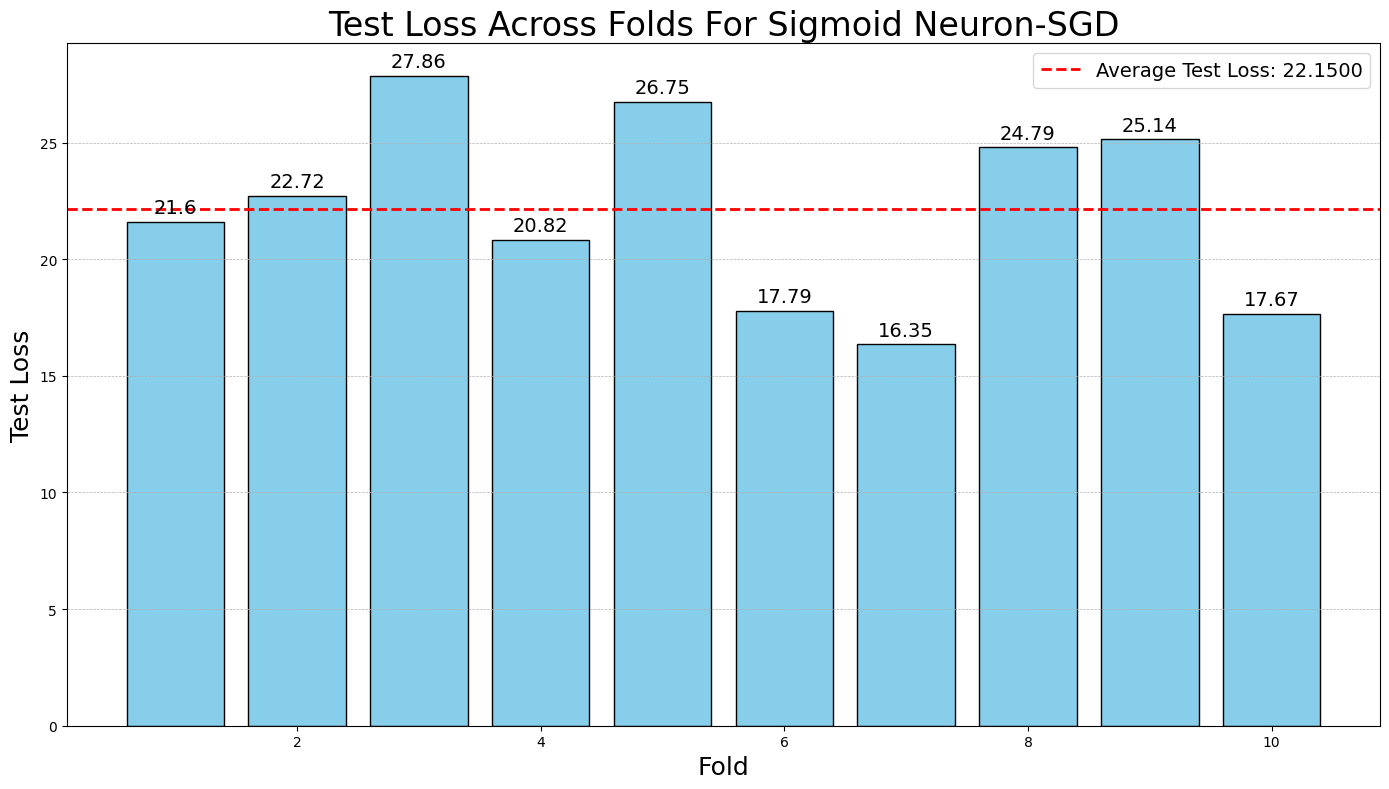

In [15]:
# Example eval_results for demonstration
eval_results = [21.60, 22.72, 27.86, 20.82, 26.75, 17.79, 16.35, 24.79, 25.14, 17.67]
red_line_value = 22.15

# Enhanced bar plot for eval_results
plt.figure(figsize=(14, 8))
bars = plt.bar(range(1, len(eval_results) + 1), eval_results, color='skyblue', edgecolor='black')

# Add titles and labels with improved font sizes and styles
plt.title('Test Loss Across Folds For Sigmoid Neuron-SGD', fontsize=24)
plt.xlabel('Fold', fontsize=18)
plt.ylabel('Test Loss', fontsize=18)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 4), ha='center', va='bottom', fontsize=14)

# Add a red horizontal line at the specified value
plt.axhline(y=red_line_value, color='red', linestyle='--', linewidth=2, label=f'Average Test Loss: {red_line_value:.4f}')

# Enhance the grid
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Add legend
plt.legend(fontsize=14)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the enhanced bar plot
plt.show()

# Batch Gradient Descent (BGD)

In [16]:
eval_results = []
epoch_num = 10
np.random.seed(42)

for fold, (train_indices, test_indices) in enumerate(kfold.split(x)):
    print(f"Fold: {fold + 1}")

    # creating the indexes for the i fold
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # converting the data to tensors
    X_train_tensor = torch.from_numpy(x_train.reshape(-1, 1)).float()
    X_test_tensor = torch.from_numpy(x_test.reshape(-1, 1)).float()
    y_train_tensor = torch.from_numpy(y_train.reshape(-1, 1)).float()
    y_test_tensor = torch.from_numpy(y_test.reshape(-1, 1)).float()

    # creating the dataloader to help us implement SGD and BGD
    dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=len(X_train_tensor), shuffle=True)

    # creating the Adaline model
    model_sigmoid = SigmoidNeuron()
    optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr=0.01)

    for epoch in range(epoch_num):
        for inputs, targets in data_loader:
            # Forward pass
            outputs = model_sigmoid(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    with torch.no_grad():
        model_sigmoid.eval()
        test_outputs = model_sigmoid(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        eval_results.append(test_loss.item())

    print(f"Test Loss: {test_loss.item()}")

# Calculate and print the average test loss across all folds
print("\n")
print("Average Test Loss:", sum(eval_results) / epoch_num)

Fold: 1
Test Loss: 20.360200881958008
Fold: 2
Test Loss: 18.8427791595459
Fold: 3
Test Loss: 23.50210189819336
Fold: 4
Test Loss: 22.531614303588867
Fold: 5
Test Loss: 19.199865341186523
Fold: 6
Test Loss: 24.820842742919922
Fold: 7
Test Loss: 22.614233016967773
Fold: 8
Test Loss: 24.110177993774414
Fold: 9
Test Loss: 22.759571075439453
Fold: 10
Test Loss: 28.21515655517578


Average Test Loss: 22.695654296875


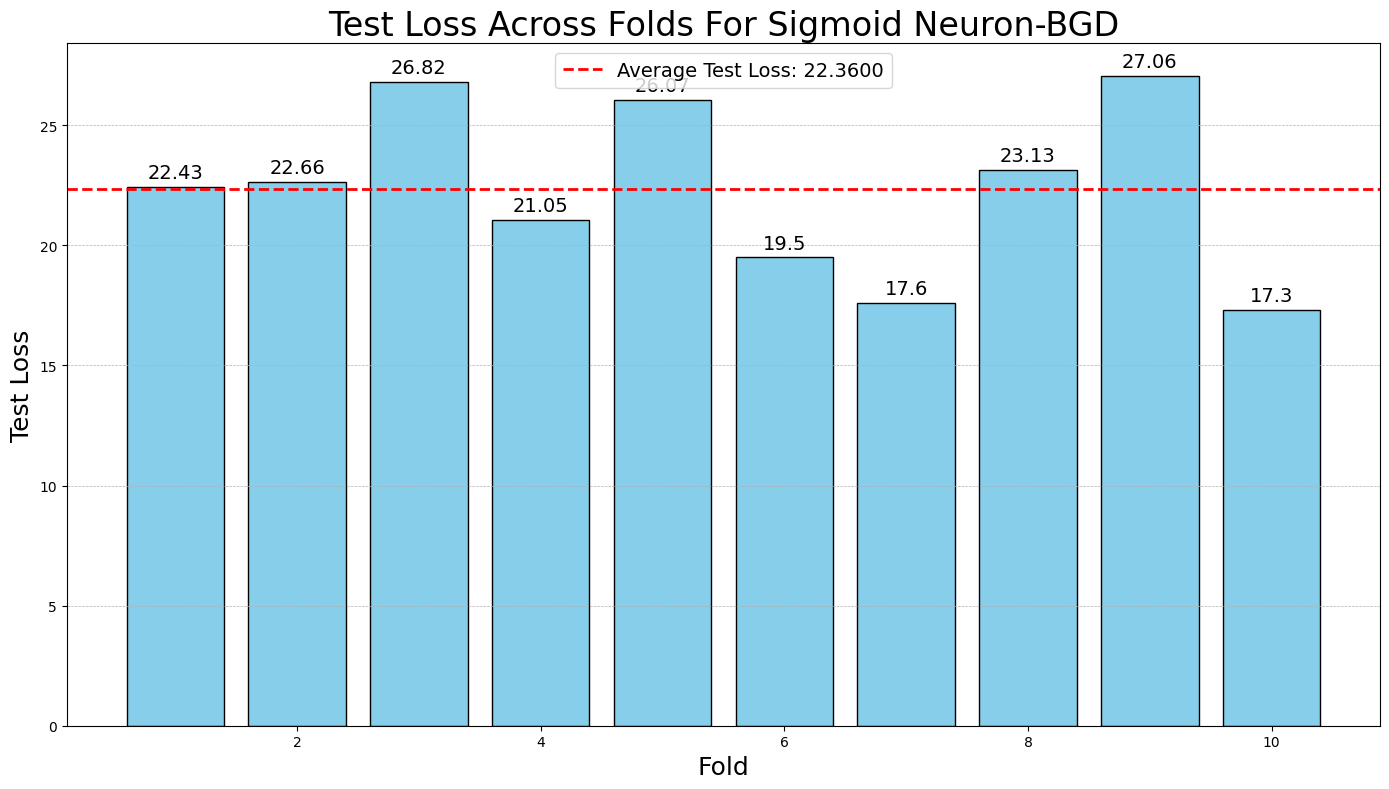

In [17]:
# Example eval_results for demonstration
eval_results = [22.43, 22.66, 26.82, 21.05, 26.07, 19.50, 17.60, 23.13, 27.06, 17.30]
red_line_value = 22.36

# Enhanced bar plot for eval_results
plt.figure(figsize=(14, 8))
bars = plt.bar(range(1, len(eval_results) + 1), eval_results, color='skyblue', edgecolor='black')

# Add titles and labels with improved font sizes and styles
plt.title('Test Loss Across Folds For Sigmoid Neuron-BGD', fontsize=24)
plt.xlabel('Fold', fontsize=18)
plt.ylabel('Test Loss', fontsize=18)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 4), ha='center', va='bottom', fontsize=14)

# Add a red horizontal line at the specified value
plt.axhline(y=red_line_value, color='red', linestyle='--', linewidth=2, label=f'Average Test Loss: {red_line_value:.4f}')

# Enhance the grid
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Add legend
plt.legend(fontsize=14)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the enhanced bar plot
plt.show()

# Question 2

In [18]:
# Size of the data
size = 2500

# Initialize arrays for x, y, and class
x = np.random.uniform(-100, 100, size)
y = np.random.uniform(-100, 100, size)
classes = np.zeros(size)

# Classify the points
for i in range(size):
    if y[i] < x[i]:            #if the point is below the line y = x, consider as class -1
        classes[i] = -1
    else: # point is above the line y = x
        classes[i] = 1



Plotting classes

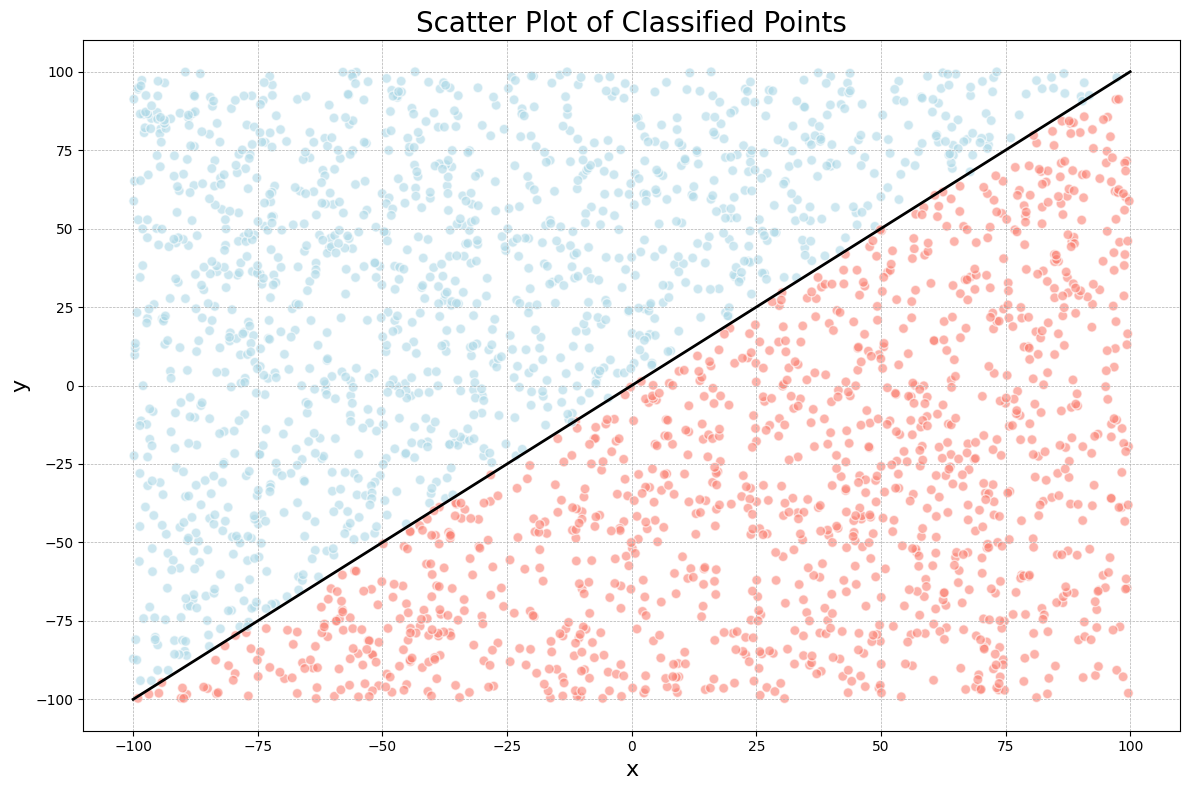

In [19]:
# Convert classes to a color map
colors = np.where(classes == 1, 'lightblue', 'salmon')

# Plot the points
plt.figure(figsize=(12, 8))
plt.scatter(x, y, c=colors, alpha=0.6, edgecolors='w', s=50)

# Add the line y = x for reference
plt.plot([-100, 100], [-100, 100], color='black', linestyle='-', linewidth=2)

# Add titles and labels
plt.title('Scatter Plot of Classified Points', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

# Add a grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the plot
plt.show()

## Perceptron Model

Cross-validation scores:  [1. 1. 1. 1. 1.]
Mean cross-validation score:  1.0
Test set score:  1.0


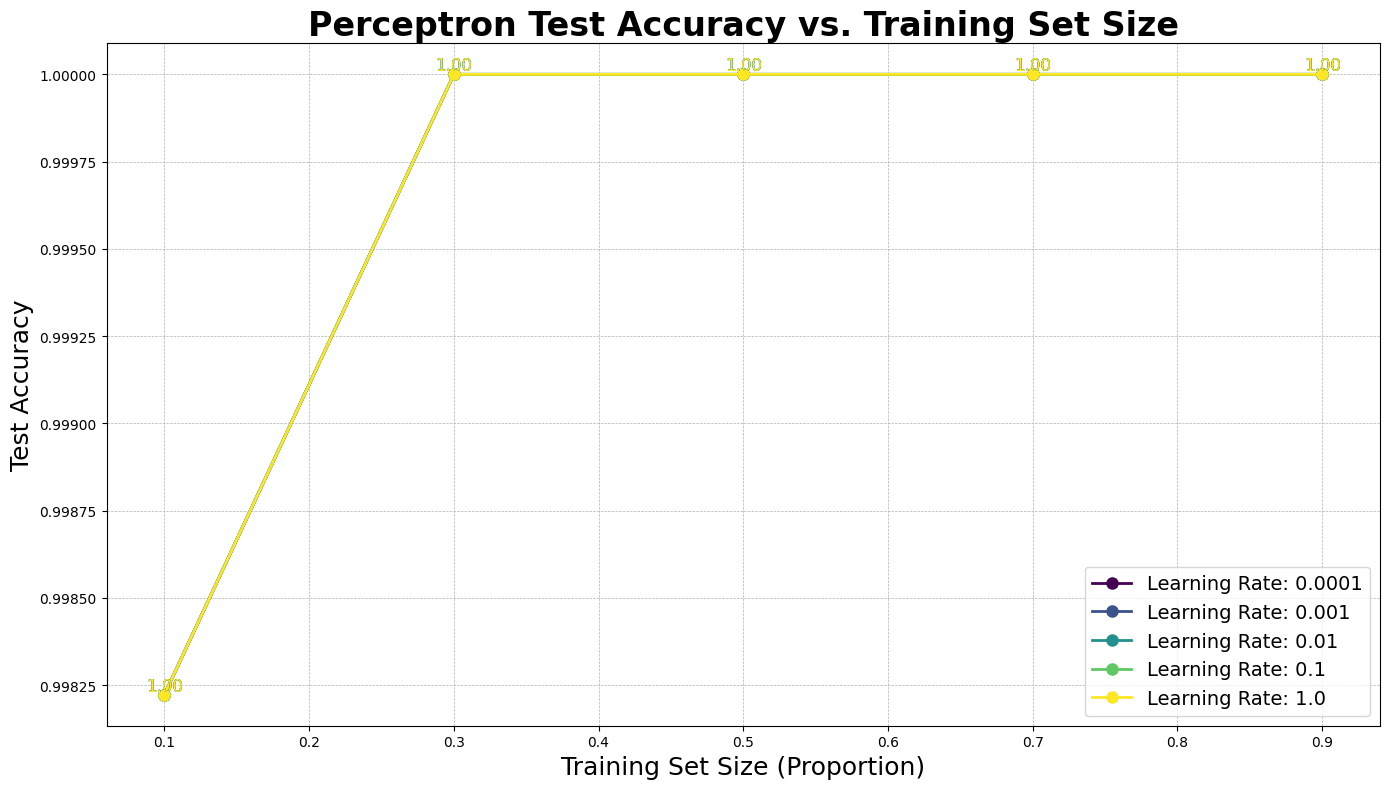

In [20]:
# Combine x and y into a single feature array
data = np.column_stack((x, y))
labels = classes

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Initialize and evaluate the Perceptron model using cross-validation
perceptron_model = Perceptron(tol=1e-3, max_iter=1000, random_state=42)
scores = cross_val_score(perceptron_model, x_train, y_train, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

# Train the Perceptron model on the training set
perceptron_model.fit(x_train, y_train)

# Evaluate the model on the test set
test_score = perceptron_model.score(x_test, y_test)
print("Test set score: ", test_score)

# Experiment with different learning rates and training set sizes
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
training_set_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
results = {}

for lr in learning_rates:
    lr_scores = []
    for ts in training_set_sizes:
        x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1-ts, random_state=42)
        perceptron_model = Perceptron(tol=1e-3, eta0=lr, max_iter=1000, random_state=42)
        perceptron_model.fit(x_train, y_train)
        score = perceptron_model.score(x_test, y_test)
        lr_scores.append(score)
    results[lr] = lr_scores

# Enhanced plot for Perceptron Test Accuracy vs. Training Set Size
plt.figure(figsize=(14, 8))

# Define a color palette for different learning rates
colors = plt.cm.viridis(np.linspace(0, 1, len(learning_rates)))

# Plot each learning rate with a different color and style
for lr, color in zip(learning_rates, colors):
    plt.plot(training_set_sizes, results[lr], label=f'Learning Rate: {lr}', color=color, linewidth=2, marker='o', markersize=8)

# Add titles and labels with improved font sizes and styles
plt.title('Perceptron Test Accuracy vs. Training Set Size', fontsize=24, fontweight='bold')
plt.xlabel('Training Set Size (Proportion)', fontsize=18)
plt.ylabel('Test Accuracy', fontsize=18)

# Enhance the legend
plt.legend(fontsize=14, loc='best')

# Add grid with improved style
plt.grid(True, linestyle='--', linewidth=0.5)

# Add data labels on the points for better readability
for lr, color in zip(learning_rates, colors):
    for x, y in zip(training_set_sizes, results[lr]):
        plt.text(x, y, f'{y:.2f}', fontsize=12, ha='center', va='bottom', color=color)

# Add a tight layout to adjust the padding
plt.tight_layout()

# Show the enhanced plot
plt.show()

In [21]:
# Initialize the Pocket Algorithm
def pocket_algo(X, Y, T):
    w = np.zeros(X.shape[1])
    best_w = np.copy(w)
    best_error = np.inf

    for t in range(T):
        for i in range(X.shape[0]):
            if np.sign(np.dot(X[i], w)) != Y[i]:
                w = w + Y[i] * X[i]
                error = np.sum(np.sign(np.dot(X, w)) != Y)
                if error < best_error:
                    best_error = error
                    best_w = np.copy(w)
    return best_w

# Fit the model
w = pocket_algo(x_train, y_train, 1000)

# Evaluate the model
train_preds = np.sign(np.dot(x_train, w))
test_preds = np.sign(np.dot(x_test, w))

train_accuracy = np.mean(train_preds == y_train)
test_accuracy = np.mean(test_preds == y_test)

print("Training set score: ", train_accuracy)
print("Test set score: ", test_accuracy)

# Perform cross-validation to evaluate the pocket algorithm
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, test_index in kf.split(data):
    x_train_cv, x_test_cv = data[train_index], data[test_index]
    y_train_cv, y_test_cv = labels[train_index], labels[test_index]
    w_cv = pocket_algo(x_train_cv, y_train_cv, 1000)
    test_preds_cv = np.sign(np.dot(x_test_cv, w_cv))
    cv_score = np.mean(test_preds_cv == y_test_cv)
    cv_scores.append(cv_score)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))


Training set score:  1.0
Test set score:  1.0
Cross-validation scores:  [1.0, 1.0, 1.0, 1.0, 1.0]
Mean cross-validation score:  1.0
